# About Dataset

ACME Insurance Inc. offers affordable health insurance to thousands of customer all over the United States. You're tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer.

 ## Importing important libraries and dataset

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso , ElasticNet, SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [99]:
df= pd.read_csv("C:\\Users\\aishw\\Downloads\\expenses.csv")

In [100]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
df.shape

(1338, 7)

In [103]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [105]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [106]:
df['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

since all the ages are in integer form then we will change the data type from float to integer.

In [107]:
df['age'] = df['age'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [108]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [109]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## EDA

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


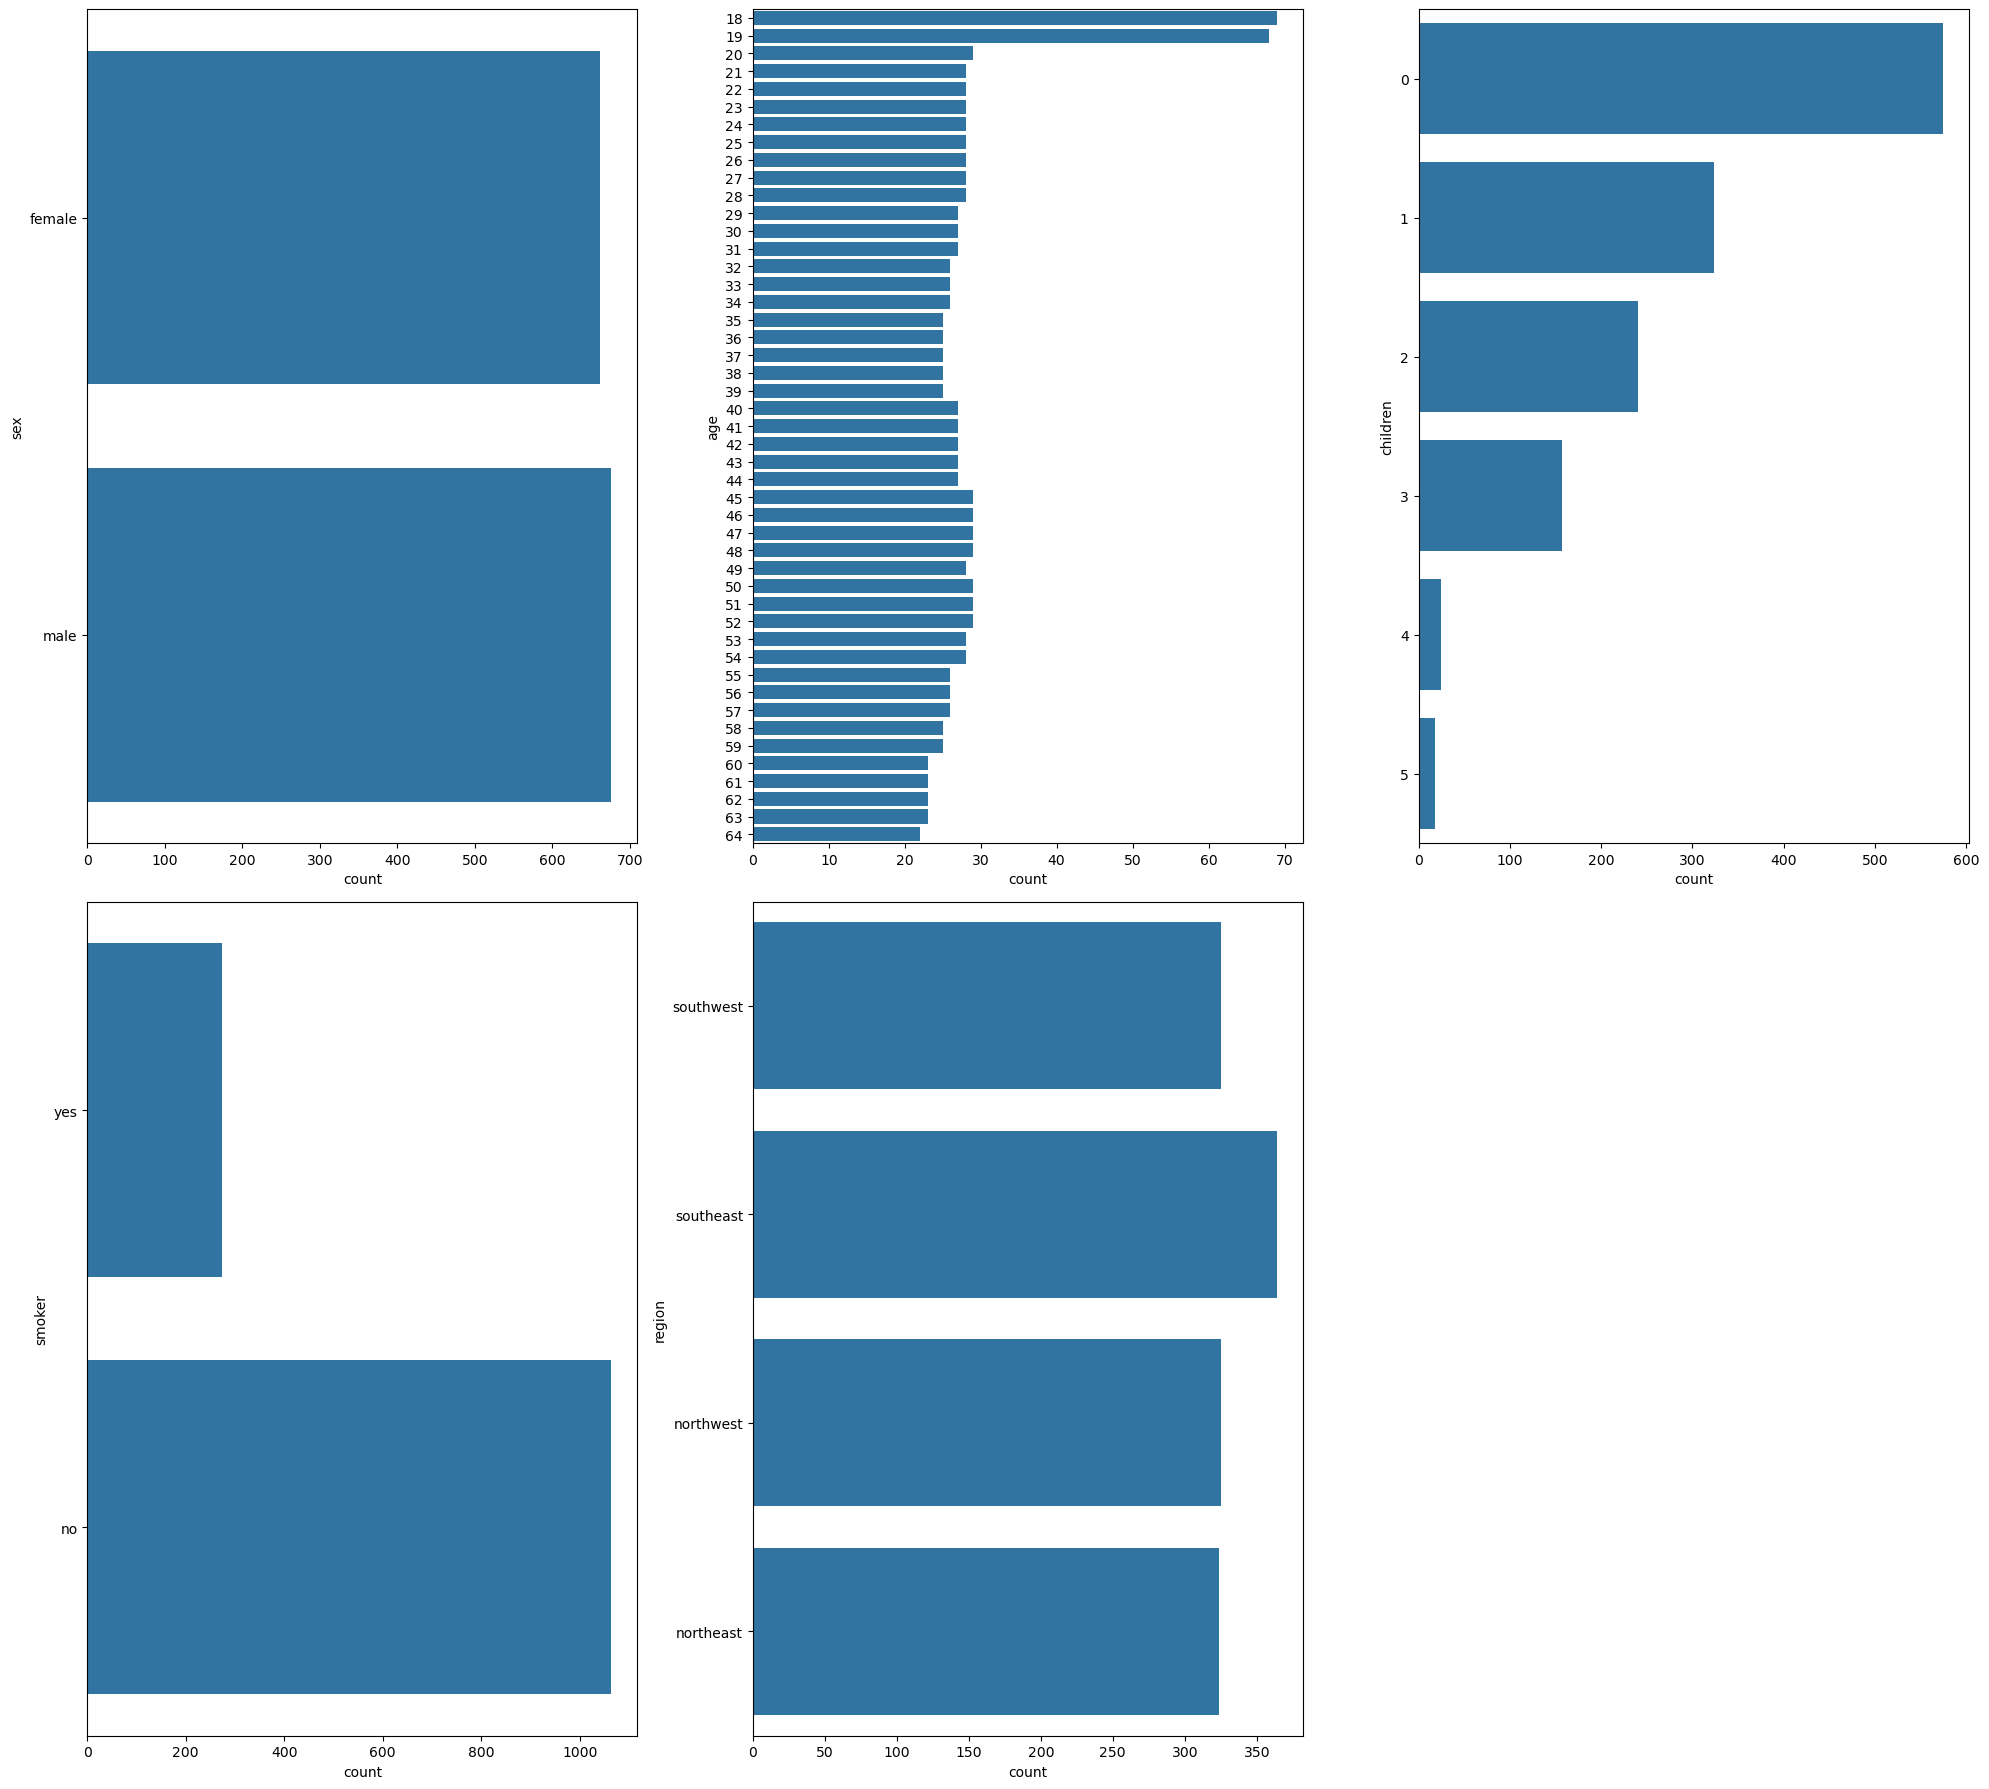

In [111]:
# count plot
plt.figure(figsize=(20,18))
plt.subplot(2,3,1)
sns.countplot(data=df,y='sex')
plt.subplot(2,3,2)
sns.countplot(data=df,y='age')
plt.subplot(2,3,3)
sns.countplot(data=df,y='children')
plt.subplot(2,3,4)
sns.countplot(data=df,y='smoker')
plt.subplot(2,3,5)
sns.countplot(data=df,y='region')
plt.tight_layout()
plt.show()

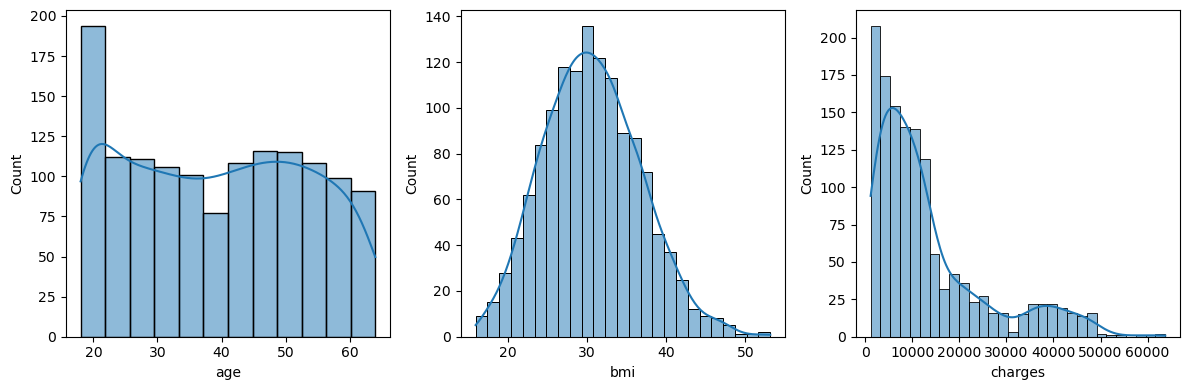

In [112]:
# histplot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(data=df,x='age',kde=True)
plt.subplot(1,3,2)
sns.histplot(data=df,x='bmi',kde=True)
plt.subplot(1,3,3)
sns.histplot(data=df,x='charges',kde=True)
plt.tight_layout()
plt.show()

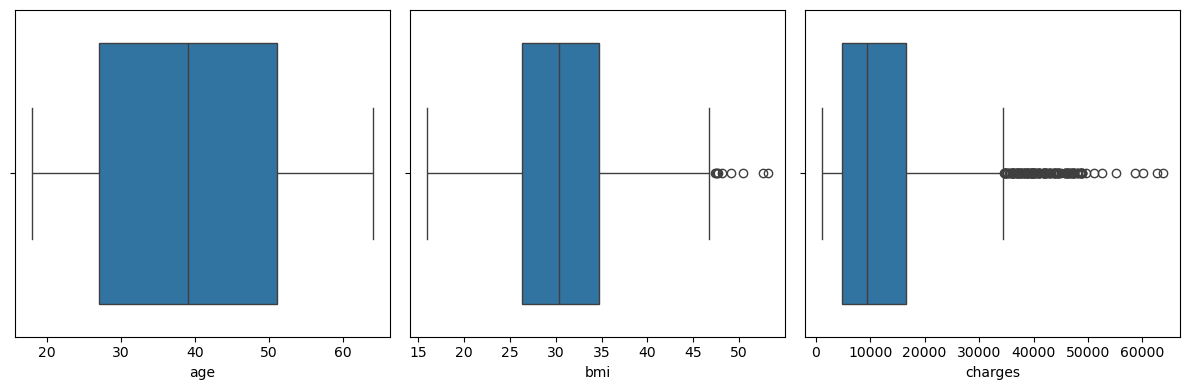

In [113]:
#boxplot
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.boxplot(data=df,x='age')
plt.subplot(1,3,2)
sns.boxplot(data=df,x='bmi')
plt.subplot(1,3,3)
sns.boxplot(data=df,x='charges')
plt.tight_layout()
plt.show()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [124]:
df['age'].skew()

0.05567251565299186

<Axes: >

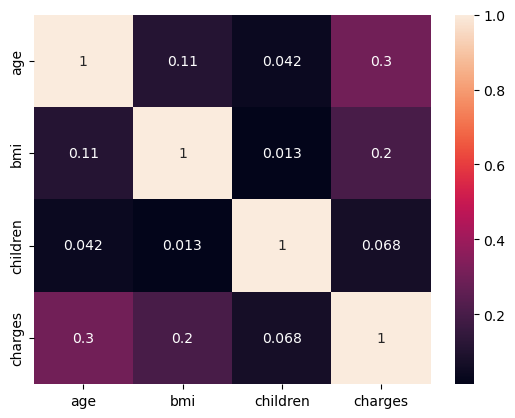

In [121]:
#heatmap
sns.heatmap(data=df.drop(columns=['sex','smoker','region']).corr(),annot=True)

##### Observations
- There is an expected high positive correlation between age and charges.
- We can also observe a significant positive correlation between bmi and charges.

## Handling the outliers

In [205]:
df['bmi'].skew()

0.2840471105987448

bmi is positively skewed
hence triming the outliers using the percentile method

In [189]:
df['bmi'].describe()

count    1070.000000
mean       30.560397
std         6.043386
min        15.960000
25%        26.205000
50%        30.210000
75%        34.496250
max        53.130000
Name: bmi, dtype: float64

In [190]:
u= df['bmi'].quantile(0.99)
l= df['bmi'].quantile(0.01)
print(f"upper limit = {u} and lower limit = {l}")

upper limit = 45.65159999999998 and lower limit = 18.19305


In [206]:
df[(df['bmi']<l) | (df['bmi']>u)].value_counts().sum()

33

so there are some data entries that we are going to remove

In [207]:
df=df[(df['bmi']>=l) & (df['bmi']<=u)]

In [208]:
df.shape

(1305, 7)

In [209]:
df.describe()

,age,bmi,children,charges
count,1305.000000,1305.000000,1305.000000,1305.000000
mean,39.342529,30.601444,1.091954,13286.294458
std,14.057067,5.658023,1.208027,12015.744226
min,18.000000,18.300000,0.000000,1121.873900
25%,27.000000,26.400000,0.000000,4762.329000
50%,40.000000,30.400000,1.000000,9391.346000
75%,51.000000,34.430000,2.000000,16884.924000
max,64.000000,45.540000,5.000000,62592.873090


<Axes: xlabel='bmi'>

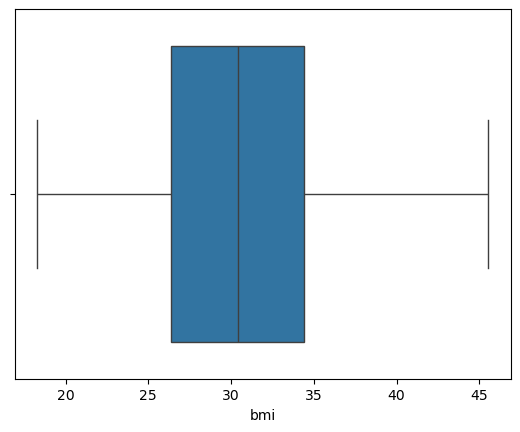

In [211]:
sns.boxplot(data=df,x='bmi')

In [212]:
df['bmi'].skew()

0.16905764907145032

## Spliting the data into training and testing

In [213]:
x_train,x_test,y_train,y_test= train_test_split(df.drop(columns=['charges']),df['charges'],test_size=0.2,random_state=42)

## Scaling and Encoding

The age variable shows no extreme outliers and only mild skewness. Therefore, mean–variance scaling is appropriate, and StandardScaler is applied.
And similar logic for bmi.

In [214]:
x_train.head()

,age,sex,bmi,children,smoker,region
1007,47,male,28.215,3,yes,northwest
994,27,female,20.045,3,yes,northwest
10,25,male,26.220,0,no,northeast
150,35,male,24.130,1,no,northwest
354,18,female,38.280,0,no,southeast


In [215]:
ct = ColumnTransformer([('one',OneHotEncoder(drop='first',sparse_output=False),[1,4,5]),
                         ('scl',StandardScaler(),[0,2])
],remainder='passthrough')

In [216]:
x_train=ct.fit_transform(x_train)

In [217]:
x_test= ct.transform(x_test)

In [218]:
df1 = pd.DataFrame(
    x_train,
    columns=ct.get_feature_names_out()
)

In [270]:
df2= pd.DataFrame(
    x_test,
    columns= ct.get_feature_names_out()
)

In [219]:
df1.sample(10)

,one__sex_male,one__smoker_yes,one__region_northwest,one__region_southeast,one__region_southwest,scl__age,scl__bmi,remainder__children
608,0.0,0.0,0.0,1.0,0.0,-1.031259,0.291190,1.0
94,0.0,0.0,0.0,1.0,0.0,-0.888951,-1.303285,1.0
677,0.0,0.0,0.0,0.0,1.0,-1.458185,-0.385843,1.0
735,0.0,1.0,0.0,1.0,0.0,1.459139,0.330079,0.0
739,0.0,1.0,1.0,0.0,0.0,-1.458185,-0.099474,0.0
919,1.0,0.0,1.0,0.0,0.0,0.036054,0.051665,4.0
168,1.0,0.0,0.0,0.0,1.0,-1.458185,0.674783,0.0
824,0.0,1.0,1.0,0.0,0.0,-1.458185,-0.401753,0.0
814,1.0,0.0,0.0,0.0,0.0,-0.390871,-1.627659,0.0
520,0.0,0.0,1.0,0.0,0.0,-0.319717,0.924914,1.0


In [284]:
x= pd.concat([df1, df2], axis=0)
y= pd.concat([y_train,y_test],axis=0)

In [285]:
x.head()

,one__sex_male,one__smoker_yes,one__region_northwest,one__region_southeast,one__region_southwest,scl__age,scl__bmi,remainder__children
0,1.0,1.0,1.0,0.0,0.0,0.534134,-0.418546,3.0
1,0.0,1.0,1.0,0.0,0.0,-0.888951,-1.862765,3.0
2,1.0,0.0,0.0,0.0,0.0,-1.031259,-0.771204,0.0
3,1.0,0.0,1.0,0.0,0.0,-0.319717,-1.140655,1.0
4,0.0,0.0,0.0,1.0,0.0,-1.529339,1.360654,0.0


## Finding the best model

## Linear regression

In [220]:
lr= LinearRegression()

In [221]:
lr.fit(x_train,y_train)

LinearRegression()

In [222]:
y_lr_predict= lr.predict(x_test)

In [229]:
r2_score(y_test,y_lr_predict)

0.7626741896536772

In [231]:
np.sqrt(mean_squared_error(y_test,y_lr_predict))

5774.50787201563

In [232]:
mean_absolute_error(y_test,y_lr_predict)

4068.685467629931

In [301]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    lr,
    x,
    y,
    cv=cv,
    scoring='r2'
)

print("Average R2:", scores.mean())

Average R2: 0.7448344024050256


## Stocastic gradient decent regression

In [289]:
sgd = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)

In [290]:
sgd.fit(x_train, y_train)

SGDRegressor(learning_rate='constant', max_iter=100)

In [291]:
y_sgd_predict= sgd.predict(x_test)

In [292]:
r2_score(y_test,y_sgd_predict)

0.7631828371710646

In [293]:
np.sqrt(mean_squared_error(y_test,y_sgd_predict))

5768.316458285356

In [294]:
mean_absolute_error(y_test,y_sgd_predict)

4194.768876386913

In [296]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    sgd,
    x,
    y,
    cv=cv,
    scoring='r2'
)

print("Average R2:", scores.mean())

Average R2: 0.7376335811794574


## Ridge regression

In [298]:
# we need to find the optimal value of alpha for which we get the best result
rse = {}
r_sq = {}
b= np.logspace(-4, 2, 100)
for a in b:
    rid = Ridge(alpha=a)
    rid.fit(x_train, y_train)

    y_pred_rid = rid.predict(x_test)

    rse[a] = np.sqrt(mean_squared_error(y_test, y_pred_rid))
    r_sq[a] = r2_score(y_test, y_pred_rid)


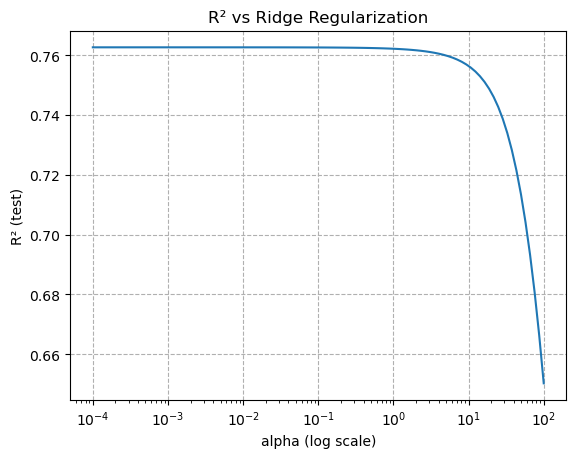

In [300]:
plt.semilogx(b, r_sq.values())
plt.xlabel("alpha (log scale)")
plt.ylabel("R² (test)")
plt.title("R² vs Ridge Regularization")
plt.grid(ls='--')
plt.show()

From the R² vs Ridge regularization plot (log-scale), we observe that performance remains stable for small α, peaks at moderate α, and degrades rapidly for large α due to underfitting. This indicates that mild regularization provides the optimal bias–variance trade-off for the given PCA-transformed features.

- Final conclusion

The optimal Ridge regularization strength lies in the moderate range (α ≈ 1 to 5). Weak regularization does little, while strong regularization leads to underfitting.

- Bias–variance trade-off explanation 

    - Small α → low bias, acceptable variance

    - Moderate α → best bias–variance trade-off

    - Large α → high bias, underfitting



In [302]:
# to select best alpha
best_alpha = max(r_sq, key=r_sq.get)
best_r2 = r_sq[best_alpha]

print("Best alpha:", best_alpha)
print("Best R²:", best_r2)

Best alpha: 0.0001
Best R²: 0.7626741439048838


In [303]:
rid = Ridge(alpha=0.0001)
rid.fit(x_train, y_train)
y_pred_rid = rid.predict(x_test)

In [345]:
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
scores = cross_val_score(
    rid,
    x,
    y,
    cv=cv
)

scores

array([0.65264296, 0.80985446, 0.80285745, 0.71279699, 0.72201485,
       0.69596366, 0.78309818, 0.73018265, 0.81245689, 0.69146785,
       0.76479596, 0.73530743, 0.75081374, 0.73678794, 0.75135341,
       0.78049563, 0.71389897, 0.75935657, 0.74051021, 0.72805095,
       0.74754764, 0.74633076, 0.71547115, 0.78836443, 0.72329165,
       0.72783024, 0.73961486, 0.74003503, 0.77632029, 0.74861368,
       0.64414779, 0.67741047, 0.7548285 , 0.82937567, 0.80208647,
       0.73591035, 0.76581851, 0.78632028, 0.72295636, 0.72767026,
       0.73321962, 0.72275134, 0.73671912, 0.76784921, 0.76243911,
       0.77655868, 0.77158964, 0.75537048, 0.72564084, 0.71493117])

## Lasso regression

In [322]:
rse = {}
r_sq = {}

b= np.logspace(-4, 7, 100)
for a in b:
    las = Lasso(alpha=a)
    las.fit(x_train, y_train)

    y_pred_las = las.predict(x_test)

    rse[a] = np.sqrt(mean_squared_error(y_test, y_pred_las))
    r_sq[a] = r2_score(y_test, y_pred_las)

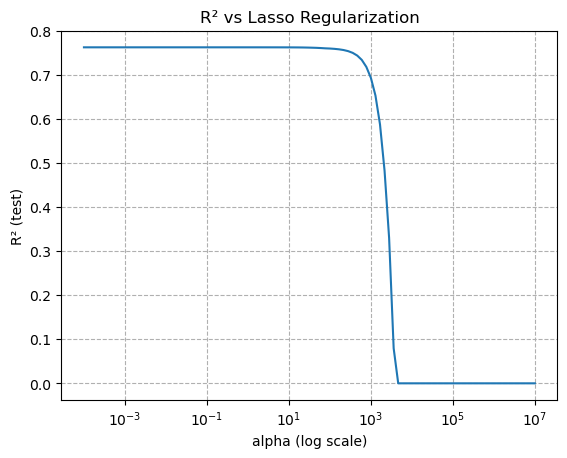

In [323]:
plt.semilogx(b, r_sq.values())
plt.xlabel("alpha (log scale)")
plt.ylabel("R² (test)")
plt.title("R² vs Lasso Regularization")
plt.grid(ls='--')
plt.show()

The R² vs Lasso regularization curve shows a sharp degradation in performance beyond moderate α values, indicating aggressive sparsity.

In [326]:
best_alpha = max(r_sq, key=r_sq.get)

print("Selected alpha:", best_alpha)

Selected alpha: 0.0001


In [327]:
las = Lasso(alpha=0.0001)
las.fit(x_train, y_train)
y_pred_las = las.predict(x_test)


In [328]:
r2_score(y_test,y_pred_las)

0.762674188842321

In [329]:
rse =np.sqrt( mean_squared_error(y_test, y_pred_las))

In [330]:
rse

5774.507881886413

In [336]:
model=[lr,sgd,rid,las]
comp= pd.DataFrame(index=range(len(model)),columns=['model','r2_score','sqrt_mse','mae'])  
comp

,model,r2_score,sqrt_mse,mae
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


In [351]:
for i in range(0,4):
    model[i].fit(x_train,y_train)
    y_pred= model[i].predict(x_test)
    r2= round(r2_score(y_test,y_pred),4)
    sqrt_mse=round( np.sqrt(mean_squared_error(y_test,y_pred)),4)
    mae= round(mean_absolute_error(y_test,y_pred),4)
    comp.iloc[i,]= [model[i],r2,sqrt_mse,mae]

In [352]:
comp

,model,r2_score,sqrt_mse,mae
0,LinearRegression(),0.7627,5774.5079,4068.6855
1,"SGDRegressor(learning_rate='constant', max_ite...",0.7484,5945.9678,4091.082
2,Ridge(alpha=0.0001),0.7627,5774.5084,4068.6868
3,Lasso(alpha=0.0001),0.7627,5774.5079,4068.6855


All linear models show similar performance with an R² of approximately 0.76, indicating a stable linear relationship between predictors and the target. Regularization with small penalty terms does not significantly improve performance.

In [350]:
#now using cross val score
cv = RepeatedKFold(
    n_splits=5,
    n_repeats=10,
    random_state=42
)
comp2=pd.DataFrame(index=range(len(model)),columns=['model','r2_score','sqrt_mse','mae'])  
for i in range(0,4):
    r2   = round(cross_val_score(model[i], x, y, cv=5, scoring='r2').mean(),4)
    rmse = round(np.sqrt(-cross_val_score(model[i], x, y, cv=5,scoring='neg_mean_squared_error')).mean(),4)
    mae  =round( -cross_val_score(model[i], x, y, cv=5,scoring='neg_mean_absolute_error').mean(),4)
    comp2.iloc[i,]= [model[i],r2,rmse,mae]

comp2

,model,r2_score,sqrt_mse,mae
0,LinearRegression(),0.748,6018.4947,4189.3686
1,"SGDRegressor(learning_rate='constant', max_ite...",0.7333,6206.1266,4285.5972
2,Ridge(alpha=0.0001),0.748,6018.4947,4189.3695
3,Lasso(alpha=0.0001),0.748,6018.4947,4189.3686


In [349]:
round(0.77777333243,4)

0.7778

### Conclusion:
Using demographic and lifestyle variables such as age, BMI, smoking status, number of children, sex, and region, linear regression based models were developed to predict medical insurance charges. After appropriate preprocessing, outlier handling, and feature encoding, model performance was evaluated using 5-fold cross-validation.

All linear models that are Linear Regression, Ridge, Lasso, and SGDRegressor achieved similar performance with an average R² of approximately 0.75, indicating that around 75% of the variability in insurance charges is explained by the available predictors. Regularization did not significantly improve performance, suggesting limited multicollinearity and a largely linear relationship between predictors and the target variable.

The results demonstrate that a simple Linear Regression model provides a strong and interpretable baseline for this problem. However, the remaining unexplained variance indicates that additional features or non-linear models may be required for further performance improvement.